# Assignment 4

# Collaboration by Minghao Li, Dongke Wang

In [1]:
import networkx as nx
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
import networkx.algorithms.community as nxcom
from networkx.algorithms.community.centrality import girvan_newman
from networkx import edge_betweenness_centrality
from random import random
import itertools
from scipy.stats import poisson
from networkx.algorithms import approximation

In [2]:
g1 = nx.read_gml('graph_karate.gml')
g2 = nx.read_gml('graph_dolphins.gml')
g3 = nx.read_gml('graph_jazz_collab.gml')

# A04.1 Community detection

In [3]:
comm = sorted(nxcom.greedy_modularity_communities(g1), key=len, reverse=True)
nxcom.modularity(g1,comm)

0.3806706114398422

In [4]:
comm = sorted(nxcom.greedy_modularity_communities(g2), key=len, reverse=True)
nxcom.modularity(g2,comm)

0.4954906847039278

In [5]:
comm = sorted(nxcom.greedy_modularity_communities(g3), key=len, reverse=True)
nxcom.modularity(g3,comm)

0.43890781537538287

The largest modularity of greedy modularity maximization is 0.4954906847039278 from g2 (graph_dolphins)

In [6]:
def GMM(g):
    comm = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)
    array=np.array(comm)
    for v in g.nodes():
        if v in array[0]:
            g.nodes[v]['color'] = 'red'
        elif v in array[1]:
            g.nodes[v]['color'] = 'blue'
        elif v in array[2]:
            g.nodes[v]['color'] = 'green'
        elif v in array[3]:
            g.nodes[v]['color'] = 'yellow'
    if len(array)>3:
        nx.draw(g,with_labels=True,node_color = [g.nodes[v]['color'] for v in g.nodes()],font_size=10,node_size=200)
    else:
        nx.draw(g,with_labels=True,node_color = [g.nodes[v]['color'] for v in g.nodes()])

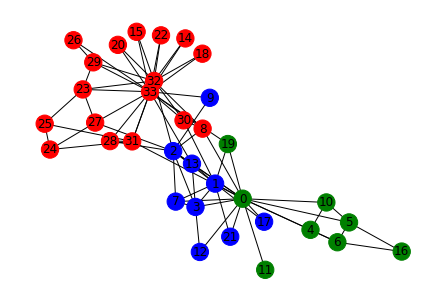

In [7]:
GMM(g1)

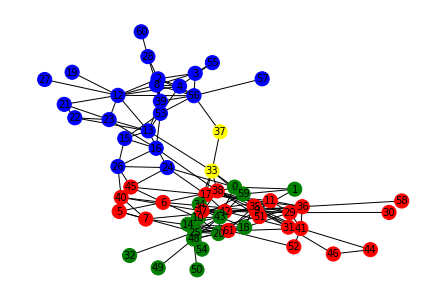

In [8]:
GMM(g2)

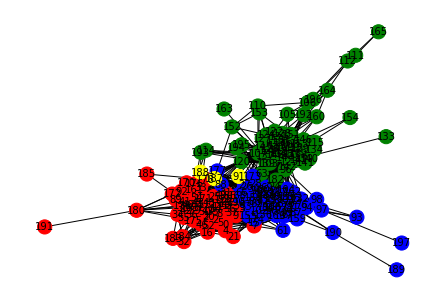

In [9]:
GMM(g3)

In [10]:
def GN_mod(g):
    comp = girvan_newman(g)
    compl = tuple(sorted(c) for c in next(comp))
    return nxcom.modularity(g,compl)

The largest modularity of Girvan-Newman algorithm is 0.3787033740753925 from g2 (graph_dolphins)

In [11]:
GN_mod(g1)

0.3599605522682445

In [12]:
GN_mod(g2)

0.3787033740753925

In [13]:
GN_mod(g3)

0.003629948484843543

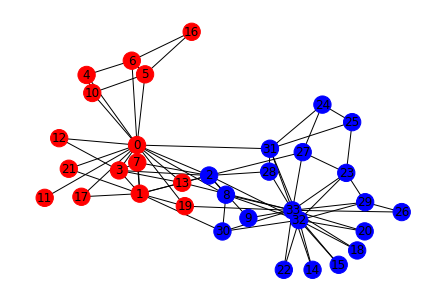

In [14]:
com1 = tuple(sorted(c) for c in next(girvan_newman(g1)))
for v in g1.nodes():
    if v in com1[0]:
        g1.nodes[v]['color'] = 'red'
    else:
        g1.nodes[v]['color'] = 'blue'
nx.draw(g1,with_labels=True,node_color = [g1.nodes[v]['color'] for v in g1.nodes()])

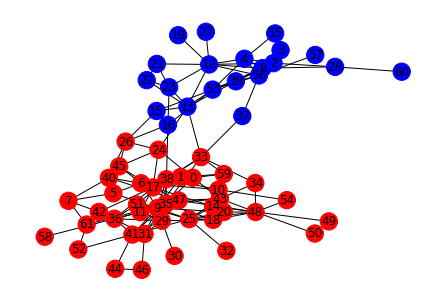

In [15]:
#  The largest modularity of Girvan-Newman algorithm is 0.3787033740753925 from g2 (graph_dolphins)
#  This is the graph of largest modularity
com2 = tuple(sorted(c) for c in next(girvan_newman(g2)))
for v in g2.nodes():
    if v in com2[0]:
        g2.nodes[v]['color'] = 'red'
    else:
        g2.nodes[v]['color'] = 'blue'
nx.draw(g2,with_labels=True,node_color = [g2.nodes[v]['color'] for v in g2.nodes()])

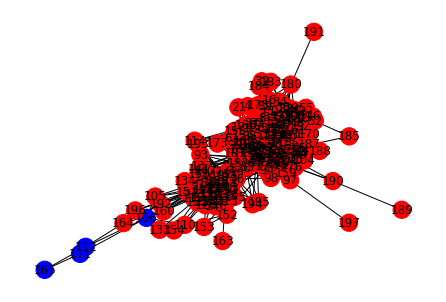

In [16]:
com3 = tuple(sorted(c) for c in next(girvan_newman(g3)))
for v in g3.nodes():
    if v in com3[0]:
        g3.nodes[v]['color'] = 'red'
    else:
        g3.nodes[v]['color'] = 'blue'
nx.draw(g3,with_labels=True,node_color = [g3.nodes[v]['color'] for v in g3.nodes()])

In [17]:
def randGra(g):
    grnd = nx.algorithms.smallworld.random_reference(g,niter =20, connectivity=False)
    return grnd

In [18]:
def comNumOfGMM(g):
    comm = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)
    array=np.array(comm)
    lenBf = len(array)
    commr = sorted(nxcom.greedy_modularity_communities(randGra(g)), key=len, reverse=True)
    arrayr=np.array(commr)
    lenAf = len(arrayr)
    return print(f"Greedy Modularity Maximization:\n{g}: \nits number of communities is {lenBf} and its randomised network's is {lenAf}")

In [19]:
def comNumOfGN(g):
    comp = girvan_newman(g)
    compl = tuple(sorted(c) for c in next(comp))
   
    lenBf = len(compl)
    compr = girvan_newman(randGra(g))
    complr = tuple(sorted(c) for c in next(compr))
   
    lenAf = len(compl)
    return print(f"Girvan-Newman Algorithm:\n{g}: \nits number of communities is {lenBf} and its randomised network's is {lenAf}")

In [20]:
comNumOfGMM(g1)

Greedy Modularity Maximization:
Graph named "Zachary's Karate Club" with 34 nodes and 78 edges: 
its number of communities is 3 and its randomised network's is 5


In [21]:
comNumOfGMM(g2)

Greedy Modularity Maximization:
Graph with 62 nodes and 159 edges: 
its number of communities is 4 and its randomised network's is 6


In [22]:
comNumOfGMM(g3)

Greedy Modularity Maximization:
Graph with 198 nodes and 2742 edges: 
its number of communities is 4 and its randomised network's is 5


In [23]:
comNumOfGN(g1)

Girvan-Newman Algorithm:
Graph named "Zachary's Karate Club" with 34 nodes and 78 edges: 
its number of communities is 2 and its randomised network's is 2


In [24]:
comNumOfGN(g2)

Girvan-Newman Algorithm:
Graph with 62 nodes and 159 edges: 
its number of communities is 2 and its randomised network's is 2


In [25]:
comNumOfGN(g3)

Girvan-Newman Algorithm:
Graph with 198 nodes and 2742 edges: 
its number of communities is 2 and its randomised network's is 2


# A04.2 Erdos-Renyi random networks

In [26]:
gr1 = nx.erdos_renyi_graph(500,0.0006)
gr2 = nx.erdos_renyi_graph(500,0.002)
gr3 = nx.erdos_renyi_graph(500,0.005)

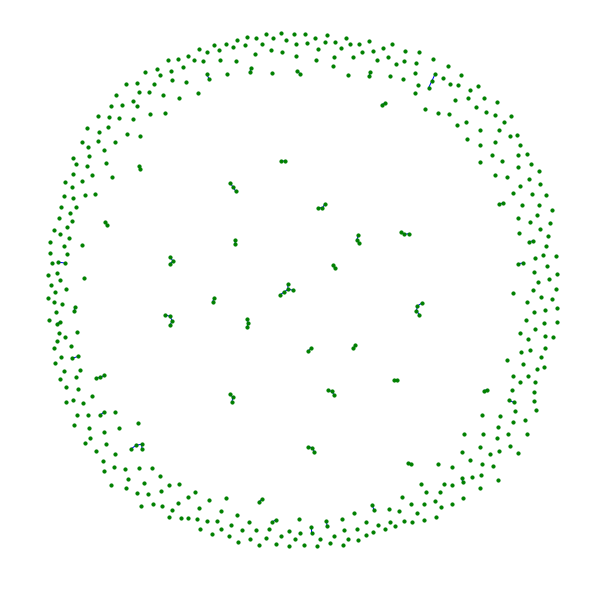

In [27]:
pos = nx.spring_layout(gr1)
plt.figure(figsize=(8, 8))
nx.draw(gr1,pos=pos,node_size=10,node_color='green',edge_color='blue')

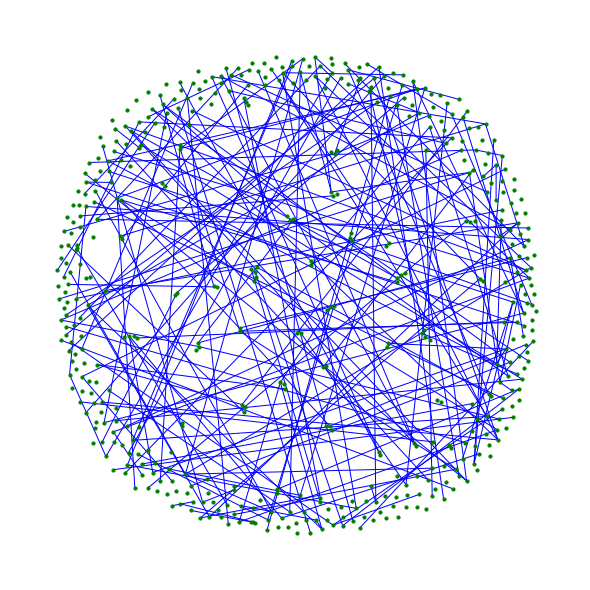

In [28]:
pos = nx.spring_layout(gr1)
plt.figure(figsize=(8, 8))
nx.draw(gr2,pos=pos,node_size=10,node_color='green',edge_color='blue')

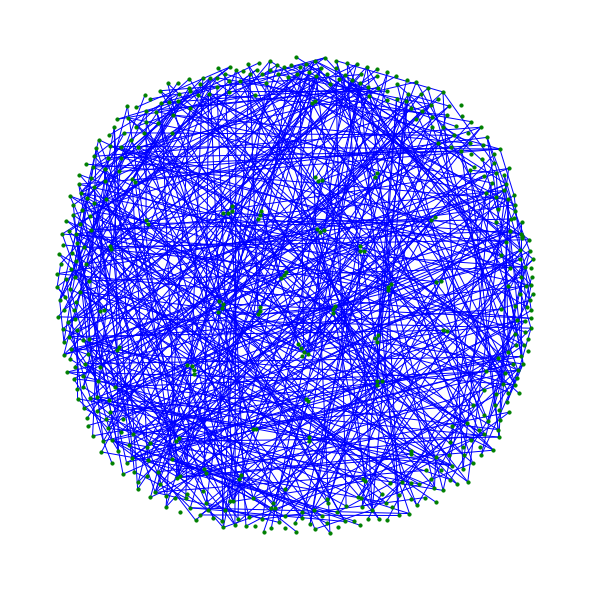

In [29]:
pos = nx.spring_layout(gr1)
plt.figure(figsize=(8, 8))
nx.draw(gr3,pos=pos,node_size=10,node_color='green',edge_color='blue')

In [1]:
g21 = nx.erdos_renyi_graph(200, 0)
pos = nx.spring_layout(gr1)
color_map = []
plt.figure(figsize=(8, 8))
nx.draw(g21,node_size =100, with_labels=True,edge_color='green')
plt.show()

NameError: name 'nx' is not defined

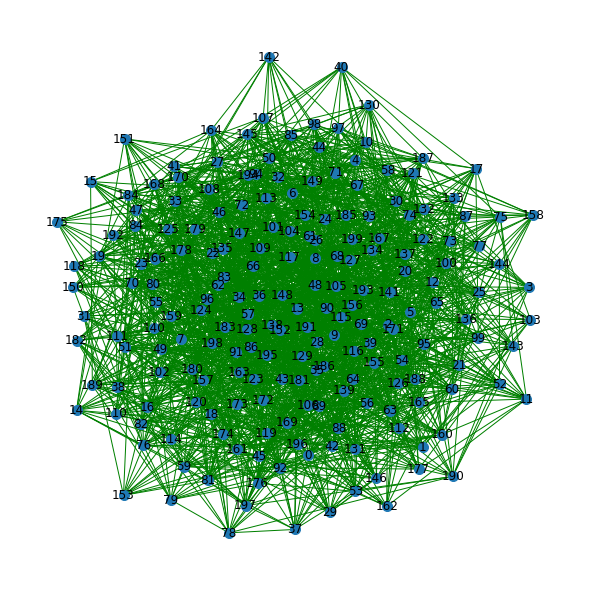

In [31]:
g21 = nx.erdos_renyi_graph(200, 0.1)
pos = nx.spring_layout(gr1)
color_map = []  
plt.figure(figsize=(8, 8))
nx.draw(g21,node_size =100, with_labels=True,edge_color='green')
plt.show()

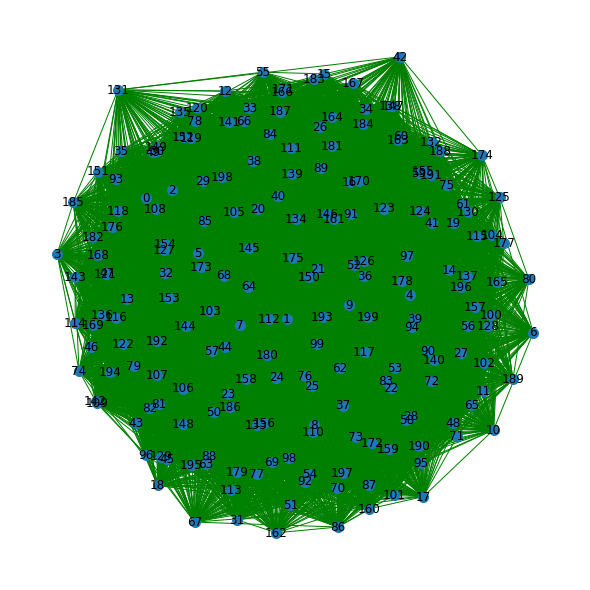

In [32]:
g21 = nx.erdos_renyi_graph(200, 0.5)
pos = nx.spring_layout(gr1)
color_map = [] 
plt.figure(figsize=(8, 8))
nx.draw(g21, node_size =100, with_labels=True,edge_color='green')
plt.show()

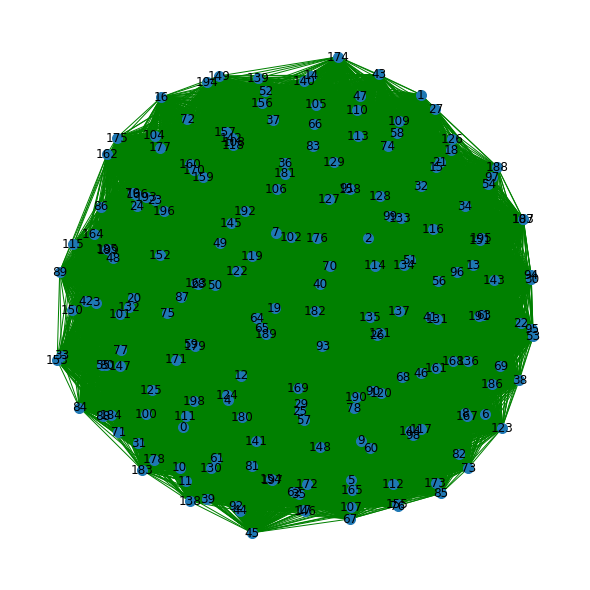

In [33]:
g21 = nx.erdos_renyi_graph(200, 1)
pos = nx.spring_layout(gr1)
color_map = []
plt.figure(figsize=(8, 8))
nx.draw(g21, node_size =100, with_labels=True,edge_color='green')
plt.show()

In [34]:
def hundNgn(p):
    n = 100
    ngnT = 0
    while(n):
        n = n-1
        g = nx.erdos_renyi_graph(200,p)
        components = [c for c in nx.connected_components(g)]
        maxcomp = max(components, key=len)
        ngn = len(maxcomp)/g.number_of_nodes()
        ngnT = ngnT + ngn
    ngnT = ngnT/100
    return ngnT

In [35]:
pc = 1/200

In [36]:
x = np.linspace(0,1,1000)

In [37]:
y = []

In [38]:
for i in x:  
    y.append(hundNgn(i))

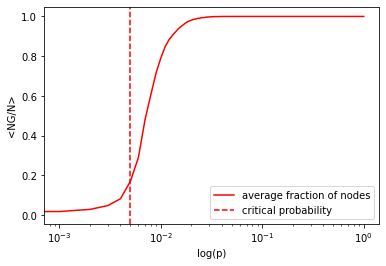

In [39]:
plt.plot(x,y,color = 'r',label="average fraction of nodes")
plt.axvline(pc,color='r',linestyle='--',label='critical probability')
plt.xlabel("log(p)")
plt.ylabel("<NG/N>")
plt.xscale('log')
plt.legend(loc = "best")
plt.show()

In [40]:
def aveC(p):
    n = 100
    aveC = 0
    while(n):
        n = n-1
        g = nx.erdos_renyi_graph(200,p)
        clu = approximation.average_clustering(g, trials=1000, seed=10)
        aveC = aveC + clu
    aveC = aveC/100
    return aveC

In [41]:
y2 = []

In [42]:
for i in x:  
    y2.append(aveC(i))

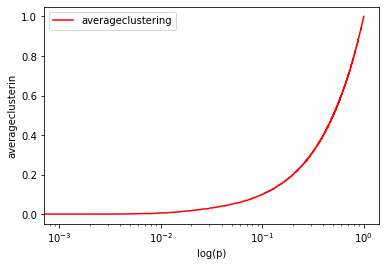

In [43]:
plt.plot(x,y2,color = 'r',label="averageclustering")
plt.xlabel("log(p)")
plt.ylabel("averageclusterin")
plt.xscale('log')
plt.legend(loc = "best")
plt.show()

In graph theory, the clustering coefficient is a coefficient used to describe the degree of clustering between vertices in a graph. Specifically, it refers to the degree of interconnection between adjacent points of a point.


P is edge creation probabilities， for each node the probability that two of its neighbors are connected is p.

So, when the probability is higher, the two neighbors are more likely to be connected, and the clustering coefficient is higher.

# A04.3 Small-world with high clustering

In [44]:
def aveClu(p):
    n = 100
    aveClu = 0
    while(n):
        n = n-1
        g = nx.connected_watts_strogatz_graph(150,6,p)
        clu = approximation.average_clustering(g, trials=1000, seed=10)
        aveClu = aveClu + clu
    aveClu = aveClu/100
    return aveClu

In [45]:
y3 = []

In [46]:
for i in x:  
    y3.append(aveClu(i)/aveClu(0))

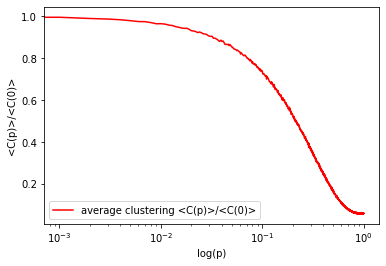

In [47]:
plt.plot(x,y3,color = 'r',label="average clustering <C(p)>/<C(0)>")
plt.xlabel("log(p)")
plt.ylabel("<C(p)>/<C(0)>")
plt.xscale('log')
plt.legend(loc = "best")
plt.show()

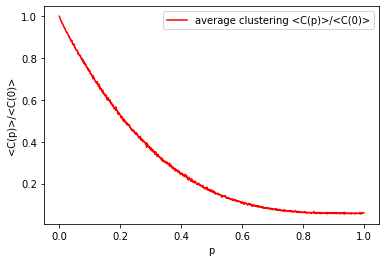

In [48]:
plt.plot(x,y3,color = 'r',label="average clustering <C(p)>/<C(0)>")
plt.xlabel("p")
plt.ylabel("<C(p)>/<C(0)>")
plt.legend(loc = "best")
plt.show()

In [49]:
# Check <C(p)>
aveClu(0.1)

0.4350899999999999

In [50]:
((3*(6-1))/(2*(11)))*((1-0.1)*(1-0.1)*(1-0.1))

0.49704545454545457

The results are approximately equal. Because the graph is produced randomly, there are slight gap between them.

In [51]:
def aveD(p):
    n = 100
    avdD = 0
    while(n):
        n = n-1
        g = nx.connected_watts_strogatz_graph(150,6,p)
        d = nx.average_shortest_path_length(g)
        avdD = avdD + d
    avdD = avdD/100
    return avdD

In [52]:
y4 = []

In [53]:
for i in x:  
    y4.append(aveD(i)/aveD(0))

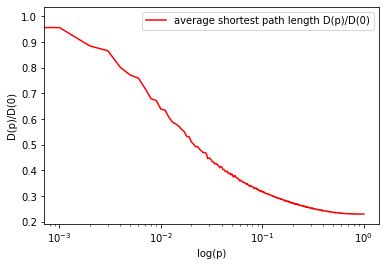

In [54]:
plt.plot(x,y4,color = 'r',label="average shortest path length D(p)/D(0)")
plt.xlabel("log(p)")
plt.ylabel("D(p)/D(0)")
plt.xscale('log')
plt.legend(loc = "best")
plt.show()

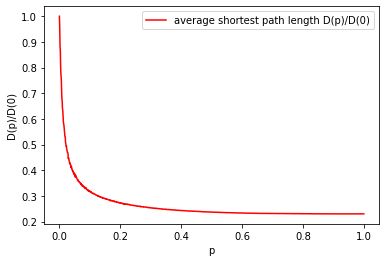

In [55]:
plt.plot(x,y4,color = 'r',label="average shortest path length D(p)/D(0)")
plt.xlabel("p")
plt.ylabel("D(p)/D(0)")

plt.legend(loc = "best")
plt.show()